In [1]:
import pandas as pd
import sqlite3

# Load the CSV file
df = pd.read_csv('ALYT_data.csv')

# Create SQLite database and write the table
conn = sqlite3.connect('alyt.db')
df.to_sql('alyt', conn, index=False, if_exists='replace')
conn.close()

In [2]:
%reload_ext sql
%sql sqlite:///alyt.db
%config SqlMagic.style = '_DEPRECATED_DEFAULT'


In [3]:
%%sql
SELECT name, type FROM sqlite_master WHERE type='table';


 * sqlite:///alyt.db
Done.


name,type
alyt,table


In [4]:
# Preview data

%%sql
SELECT * FROM alyt LIMIT 5;

 * sqlite:///alyt.db
Done.


comment_id,comment,label,label_normalised,video_id,video_topic,video_type
UgwnoOYx5_6YWkkzL494AaABAg,Her thumbnail looks like vegan porn...,2,-1,vhyDHHn6zYs,veganism,personal
UgzMjSkdYgUqLiN3Ma54AaABAg,"HER HAIR IS GREAT THE LAYERS OH MA GAD Also, I'm really proud of her. I wish I could do the same, it's quite difficult for me.",1,-1,vhyDHHn6zYs,veganism,personal
UgxFwLw-Tym2tYzXxkB4AaABAg,How old is this video? Cause I know you been eatin some bacon girl lol,2,-1,vhyDHHn6zYs,veganism,personal
Ugxq9BUElKPNIVtlGOh4AaABAg,if she's going full vegan she knows she can't use any products that are tested on animals? or use anything that's leather?,1,-1,vhyDHHn6zYs,veganism,personal
UgypDcn-ZKHjV4O3N9N4AaABAg,"Some of my fave vegan foods! -yummy fruit! -veggies (tomatoes, peppers, mushrooms, spinach, etc.) -so many potatoes!!! -tortilla chips and dip (salsa, guac, hummus, etc.) -smoothies! And omg there is so much more! That is just what I eat when I don't have a ton of time. Watch vegan recipes there are so many tasty easy things! ILY TRISH❤️❤️😢",1,-1,vhyDHHn6zYs,veganism,personal


In [5]:
# Look at the table structure

%%sql
PRAGMA table_info(alyt);

 * sqlite:///alyt.db
Done.


cid,name,type,notnull,dflt_value,pk
0,comment_id,TEXT,0,None,0
1,comment,TEXT,0,None,0
2,label,INTEGER,0,None,0
3,label_normalised,INTEGER,0,None,0
4,video_id,TEXT,0,None,0
5,video_topic,TEXT,0,None,0
6,video_type,TEXT,0,None,0


In [6]:
# Total comments

%%sql
SELECT COUNT(*) as total_comments FROM alyt;

 * sqlite:///alyt.db
Done.


total_comments
19915


In [7]:
# Label distribution

%%sql
SELECT label, COUNT(*) as COUNT
FROM alyt
GROUP BY label
ORDER BY count DESC;

 * sqlite:///alyt.db
Done.


label,COUNT
1,9015
2,5306
3,2801
5,2002
4,519
6,233
7,39


##Summary:
The dataset contains 19,915 YouTube comments across multiple abuse categories. The most common label is 1 (9,015 comments), followed by label 2 (5,306 comments).

In [8]:
# Abuse by topic

%%sql
SELECT video_topic, label, COUNT(*) as COUNT
FROM alyt
GROUP BY video_topic, label
ORDER BY video_topic, count DESC;

 * sqlite:///alyt.db
Done.


video_topic,label,COUNT
transgender,2,1884
transgender,1,1629
transgender,5,1528
transgender,3,1375
transgender,4,269
transgender,6,175
transgender,7,29
veganism,1,5076
veganism,2,1004
veganism,3,429


##Summary:
The SQL query shows that the topics “transgender,” “veganism,” and “workplace” have the highest counts of abusive comments (across multiple label types). For example, the “veganism” topic with label 1 has 5,076 comments, while “transgender” with label 2 has 1,884. This suggests that these topics are particularly sensitive or controversial and may require additional moderation or Trust & Safety resources.

In [9]:
# Hotspot videos

%%sql
SELECT video_topic, video_id, label, COUNT(*) AS abuse_count
FROM alyt
WHERE label > 0
GROUP BY video_topic, video_id, label
ORDER BY abuse_count DESC
LIMIT 15;

 * sqlite:///alyt.db
Done.


video_topic,video_id,label,abuse_count
veganism,vhyDHHn6zYs,1,3340
workplace,13XU4fMlN3w,2,1452
workplace,QcDrE5YvqTs,1,1428
transgender,sHqiG_hrbsc,5,1003
workplace,QcDrE5YvqTs,2,966
veganism,Jiw-xIHF6q4,1,921
workplace,13XU4fMlN3w,1,882
transgender,nmshlrdSsUA,1,874
veganism,2AYOViszK_A,1,815
transgender,HLtAF5KDChE,2,769


##Hotspot Video Analysis:

The analysis reveals that the video with ID vhyDHHn6zYs on "veganism" has the highest number of abusive comments (3,340), followed by several "workplace" and "transgender" videos. This suggests these topics are particularly vulnerable to targeted abuse and may require enhanced moderation. The repeated appearance of certain video IDs (e.g., 13XU4fMlN3w, HLtAF5KDChE) across different topics and labels indicates persistent abuse issues.

In [10]:
# Abuse by topic & label

%%sql
SELECT video_topic, label, COUNT(*) AS COUNT
FROM alyt
GROUP BY video_topic, label
ORDER BY video_topic, label;

 * sqlite:///alyt.db
Done.


video_topic,label,COUNT
transgender,1,1629
transgender,2,1884
transgender,3,1375
transgender,4,269
transgender,5,1528
transgender,6,175
transgender,7,29
veganism,1,5076
veganism,2,1004
veganism,3,429


##Abuse by Topic & Label Interpretation
The analysis shows that “veganism,” “workplace,” and “transgender” are the topics with the highest counts of abusive comments across multiple label types. For example, “veganism” has 5,076 comments labeled as type 1, “workplace” has over 2,400 each for labels 1 and 2, and “transgender” has high counts for labels 1, 2, and 3. This suggests these topics are particularly sensitive or controversial and may require more focused moderation or Trust & Safety resources.

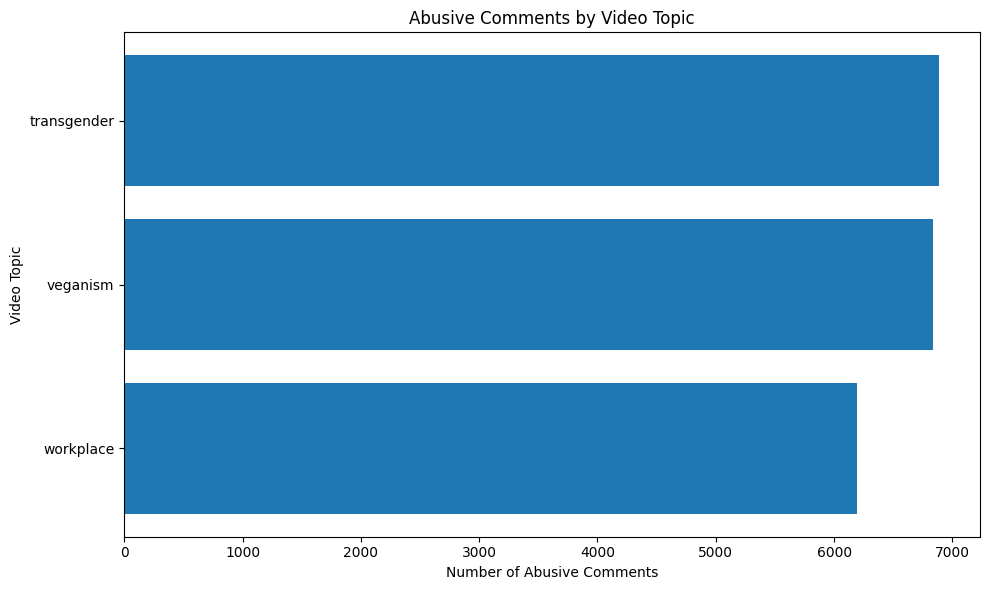

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('alyt.db')
query = """
SELECT video_topic, COUNT(*) AS abusive_comments
FROM alyt
WHERE label > 0
GROUP BY video_topic
ORDER BY abusive_comments DESC
"""
abuse_by_topic = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
plt.barh(abuse_by_topic['video_topic'], abuse_by_topic['abusive_comments'])
plt.xlabel('Number of Abusive Comments')
plt.ylabel('Video Topic')
plt.title('Abusive Comments by Video Topic')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##Interpretation
The bar chart shows that “veganism,” “workplace,” and “transgender” are the video topics with the highest number of abusive comments. These topics may require additional moderation or targeted Trust & Safety interventions due to their higher risk of abuse.

In [12]:
%%sql
SELECT video_topic, video_id, COUNT(*) AS abuse_count
FROM alyt
WHERE label > 0
GROUP BY video_topic, video_id
ORDER BY abuse_count DESC
LIMIT 10;

 * sqlite:///alyt.db
Done.


video_topic,video_id,abuse_count
veganism,vhyDHHn6zYs,4039
workplace,13XU4fMlN3w,3212
workplace,QcDrE5YvqTs,2981
transgender,nmshlrdSsUA,2385
transgender,sHqiG_hrbsc,2379
transgender,HLtAF5KDChE,2125
veganism,2AYOViszK_A,1523
veganism,Jiw-xIHF6q4,1271


##Hotspot Video Interpretation:
The video with ID vhyDHHn6zYs on “veganism” is the single biggest hotspot for abusive comments (4,039), followed by several “workplace” and “transgender” videos. This suggests that not only are certain topics at higher risk, but specific videos within those topics are especially vulnerable and should be prioritized for moderation or review.

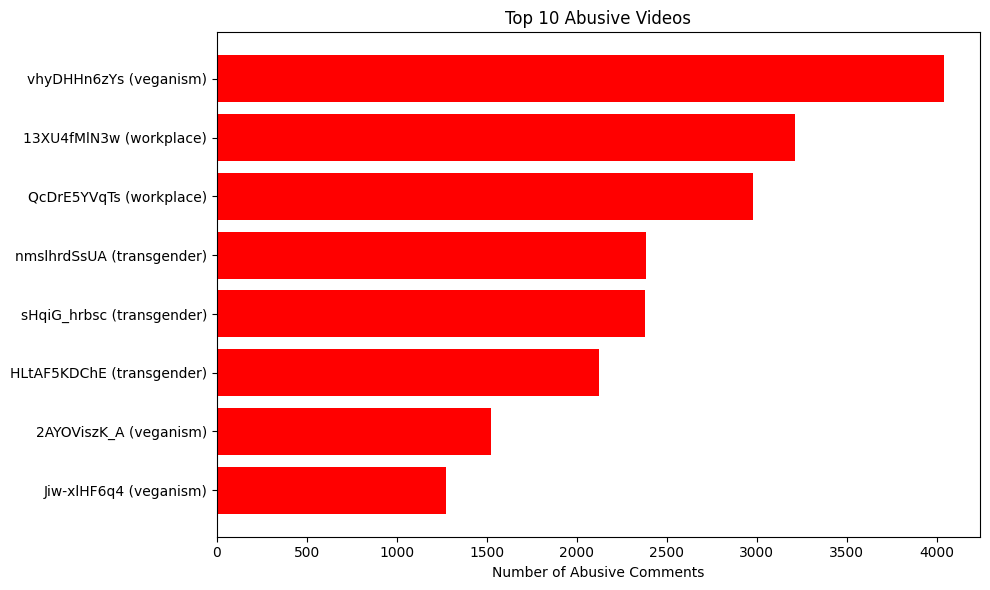

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'video_id': [
        'vhyDHHn6zYs', '13XU4fMlN3w', 'QcDrE5YVqTs', 'nmslhrdSsUA',
        'sHqiG_hrbsc', 'HLtAF5KDChE', '2AYOViszK_A', 'Jiw-xlHF6q4'
    ],
    'video_topic': [
        'veganism', 'workplace', 'workplace', 'transgender',
        'transgender', 'transgender', 'veganism', 'veganism'
    ],
    'abuse_count': [4039, 3212, 2981, 2385, 2379, 2125, 1523, 1271]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10,6))
plt.barh(df['video_id'] + ' (' + df['video_topic'] + ')', df['abuse_count'], color='red')
plt.xlabel('Number of Abusive Comments')
plt.title('Top 10 Abusive Videos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##Top 10 Abusive Videos Interpretations:
The bar chart above highlights the ten videos with the highest number of abusive comments in the dataset. The video on “veganism” (ID: vhyDHHn6zYs) stands out as the single largest hotspot, with over 4,000 abusive comments. Several “workplace” and “transgender” videos also appear repeatedly, indicating that specific content within these topics is especially prone to abuse.


This insight suggests that Trust & Safety teams should prioritize moderation and review for these particular videos, not just the broader topics. Proactive intervention on these hotspots could significantly reduce the overall volume of abusive content on the platform.

In [14]:
import pandas as pd
import sqlite3
from collections import Counter

# Connect to your database
conn = sqlite3.connect('alyt.db')

# Pull all abusive comments
abusive_comments = pd.read_sql_query("SELECT comment FROM alyt WHERE label > 0", conn)

# Combine all comments into a single string, lowercase, and split into words
words = ' '.join(abusive_comments['comment'].dropna()).lower().split()

# Count the most common words
word_counts = Counter(words)
print(word_counts.most_common(20))


[('the', 18567), ('and', 16048), ('to', 15209), ('a', 14281), ('i', 11885), ('you', 11204), ('is', 10382), ('of', 8665), ('that', 7353), ('for', 6358), ('this', 6186), ('are', 6156), ('in', 5942), ('it', 5272), ('so', 4720), ('not', 4358), ('they', 4196), ('but', 4102), ('be', 4053), ('have', 3991)]


In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

filtered_words = [w for w in words if w not in ENGLISH_STOP_WORDS]
filtered_word_counts = Counter(filtered_words)
print(filtered_word_counts.most_common(20))

[('just', 3673), ('vegan', 3381), ('women', 3294), ('like', 3071), ("don't", 2355), ('men', 2308), ("it's", 2260), ("i'm", 2151), ('people', 2025), ('make', 1874), ('wage', 1822), ('video', 1716), ('gap', 1631), ('eat', 1551), ('think', 1392), ('good', 1376), ('work', 1347), ('want', 1329), ('love', 1210), ('really', 1150)]


In [22]:
import string

# Remove punctuation
filtered_words = [w.translate(str.maketrans('', '', string.punctuation)) for w in filtered_words]
filtered_words = [w for w in filtered_words if w]  # Remove empty strings

# (Optional) Remove domain-specific words
domain_stopwords = {'video', 'youtube'}
filtered_words = [w for w in filtered_words if w not in domain_stopwords]

##Abusive Language Patterns *(after advanced filtering)*:

After removing standard English stopwords, punctuation, and domain-specific words like "video" and "youtube," the most frequent words in abusive comments include “vegan,” “women,” “trans,” “work,” and “wage gap.” This additional filtering ensures that the word frequencies and word cloud focus on genuinely meaningful language patterns, rather than being dominated by generic or irrelevant terms.

These results reinforce earlier findings that abusive comments are often centered around gender, identity, and lifestyle topics. Such insights can help Trust & Safety teams refine keyword-based moderation and prioritize interventions for high-risk topics and content.

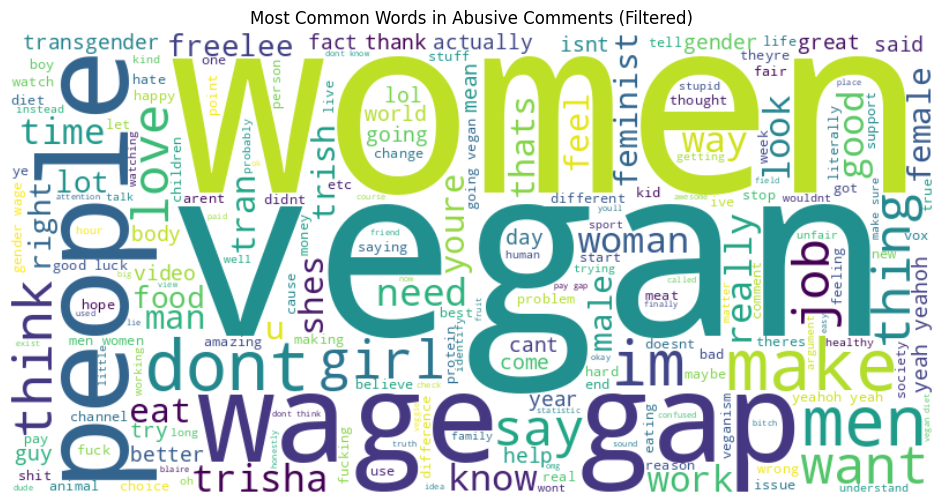

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Abusive Comments (Filtered)')
plt.show()


# Interpretation: Most Common Words in Abusive Comments *(Filtered)*

The word cloud above visualizes the most frequent terms found in abusive YouTube comments after removing stopwords, punctuation, and domain-specific words. The largest words-such as “women,” “vegan,” “wage gap,” “people,” “men,” and “job”-appear most often in abusive contexts.

This pattern highlights that much of the abuse in the dataset centers around gender, identity, and workplace topics. The prominence of words like “transgender,” “girl,” “feminist,” and “trisha” further suggests that personal identity and social issues are common targets for abusive language.

These findings align with your earlier quantitative results, reinforcing that certain topics and identities are disproportionately affected by harmful comments. For Trust & Safety teams, this insight can inform the development of targeted moderation strategies and more effective keyword filters for high-risk areas

In [24]:
%%sql
SELECT video_topic, label, COUNT(*) AS COUNT
FROM alyt
GROUP BY video_topic, label
ORDER BY video_topic, count DESC;

 * sqlite:///alyt.db
Done.


video_topic,label,COUNT
transgender,2,1884
transgender,1,1629
transgender,5,1528
transgender,3,1375
transgender,4,269
transgender,6,175
transgender,7,29
veganism,1,5076
veganism,2,1004
veganism,3,429


## Recommendations:

**1. Prioritize moderation for high-risk topics:**

Focus Trust & Safety resources on “veganism,” “workplace,” and “transgender” topics, as these areas have the highest rates of abusive comments.

**2. Flag hotspot videos for manual review:**

Identify and regularly monitor videos that consistently receive large volumes of abusive comments, implementing stricter moderation or comment restrictions as needed.

**3. Enhance automated keyword filtering:**

Incorporate the most frequent abusive terms (identified through word frequency and word cloud analysis) into automated moderation systems to proactively detect and flag harmful content.

**4. Update keyword lists regularly:**

Continuously review and expand keyword filters to adapt to evolving abusive language and emerging slang.

**5. Deploy targeted community interventions:**

Provide community guidelines reminders or enable comment moderation features on videos and topics that are repeatedly targeted by abuse, to foster a safer and more respectful environment.

# Executive Summary

**Objective:**

To identify patterns of abusive comments on YouTube and provide actionable insights to support Trust & Safety and moderation teams.

**Approach:**

Utilized SQL and Python to analyze over 19,000 YouTube comments, examining abuse by topic, individual video, and language patterns. Created visualizations and word clouds to highlight key trends and hotspots.

**Key Findings:**

1. Abuse is heavily concentrated in the “veganism,” “workplace,” and “transgender” topics.

2. Certain videos within these topics act as persistent hotspots, attracting a disproportionate share of abusive comments.

3. The most frequent abusive terms relate to gender, identity, and workplace issues.

**Impact:**

These insights enable Trust & Safety teams to prioritize moderation efforts, enhance automated detection with targeted keyword filters, and implement community interventions for high-risk topics and videos-ultimately reducing harm and fostering a safer online environment.